###2

#data description

In [ ]:

df_students = pd.read_csv("StudentsPerformance.csv")
df_students.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preprocess

In [ ]:
# 📌 Preprocess
df_students.columns = [c.strip().lower().replace(" ", "_") for c in df_students.columns]
df_students.rename(columns={"race/ethnicity":"race_ethnicity",
                            "parental_level_of_education":"parent_education",
                            "test_preparation_course":"test_prep"}, inplace=True)

dropping the missing values

In [ ]:
# Drop missing rows in critical fields
df_students.dropna(subset=["math_score","reading_score","writing_score","test_prep","lunch"], inplace=True)

Feature typing

In [ ]:
# Ensure numeric scores
for c in ["math_score","reading_score","writing_score"]:
    df_students[c] = pd.to_numeric(df_students[c], errors="coerce")


In [ ]:
# Feature: overall average
df_students["overall_avg"] = df_students[["math_score","reading_score","writing_score"]].mean(axis=1)
df_students.head()

,gender,race_ethnicity,parent_education,lunch,test_prep,math_score,reading_score,writing_score,overall_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Data visulization

#A
V1 — Gender boxplots (math vs reading)

a. Question: Are there gender differences in math vs reading?



ans:The female  has higher mathscore reading  than male students

b. Chart: Side‑by‑side boxplots of math score and reading score grouped by gender.

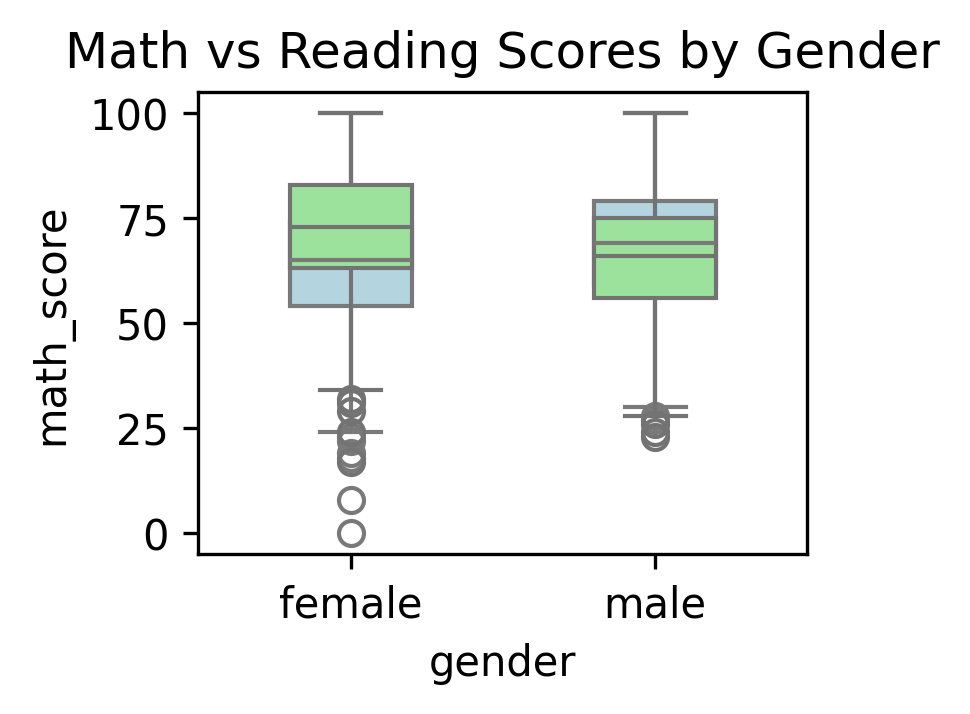

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.62,2),dpi=300)
sns.boxplot(x="gender", y="math_score", data=df_students, ax=ax, width=0.4, color="lightblue")
sns.boxplot(x="gender", y="reading_score", data=df_students, ax=ax, width=0.4, color="lightgreen")
ax.set_title("Math vs Reading Scores by Gender")
plt.show()


#B.
V2 — Test prep impact on math (2 pts)

a. Question: Do students who completed test prep score higher in math?


ans: Yes, the students who have completed the test preparation course many have higher math scores .

b. Chart: Any chart of your choice for math score by test preparation course
(completed vs none).

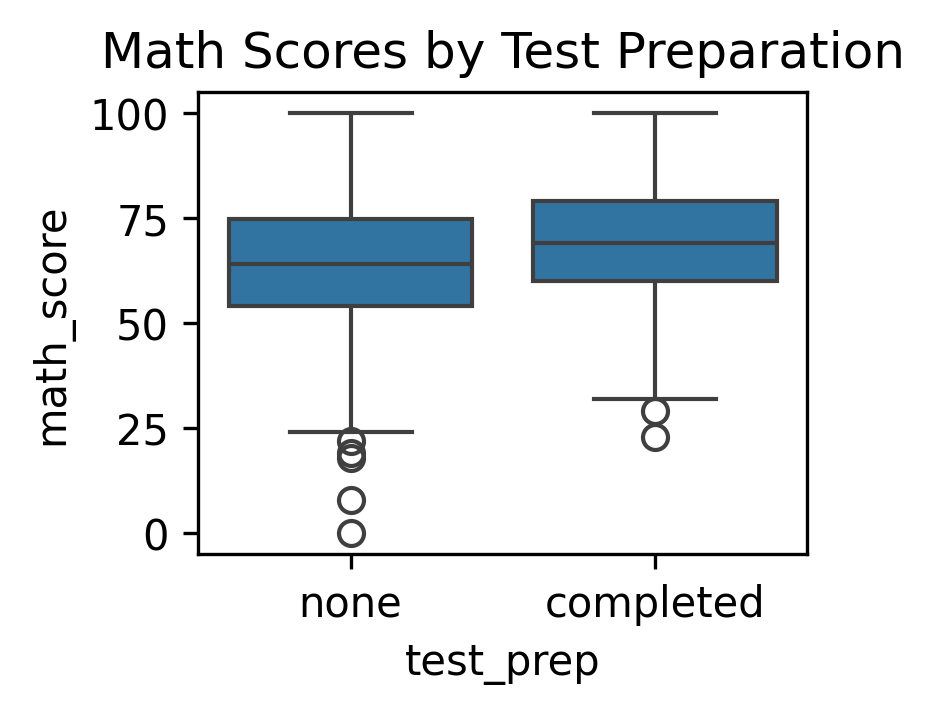

In [ ]:
fig, ax = plt.subplots(figsize=(2.62,2),dpi=300)
sns.boxplot(x="test_prep", y="math_score", data=df_students, ax=ax)
ax.set_title("Math Scores by Test Preparation")
plt.show()


#C.
V3 — Lunch type and average performance (2 pts)

a. Question: Does lunch type (standard vs free/reduced) relate to outcomes?


ans:Yes, students who are having standard lunch is having overall average score campared to free/ reduced lunch .

b. Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading,
writing) by lunch.

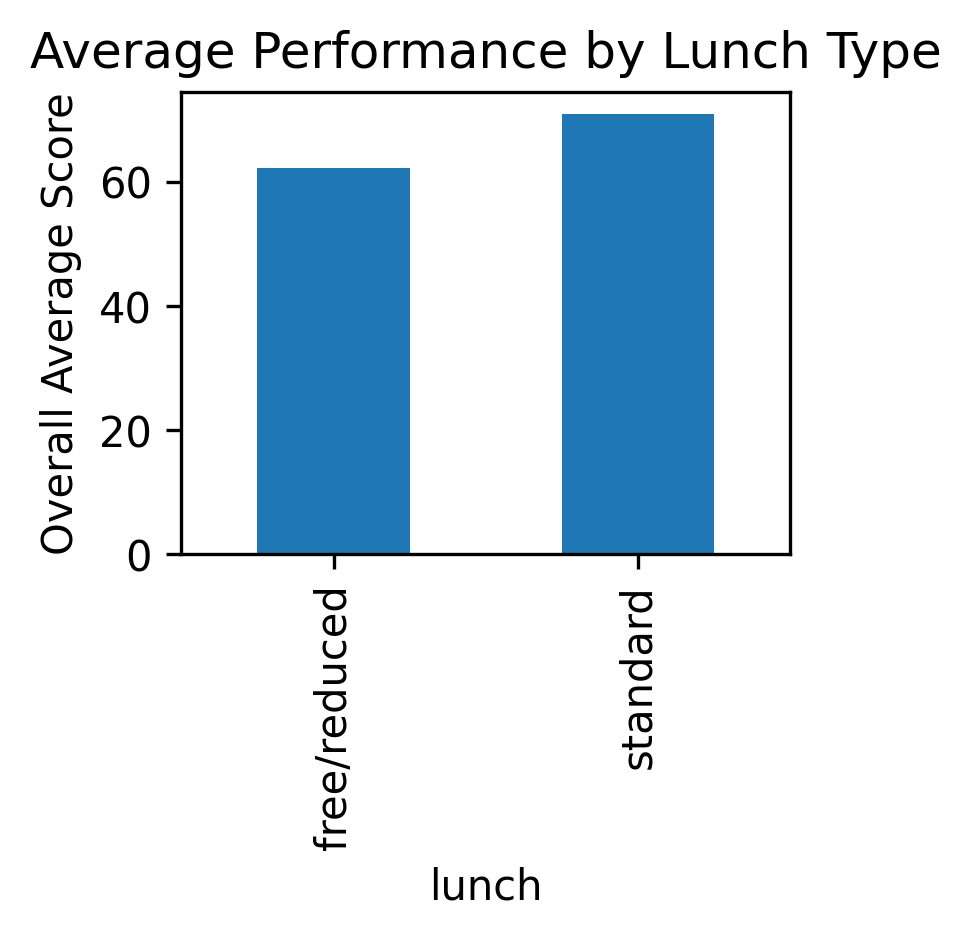

In [ ]:
fig, ax = plt.subplots(figsize=(2.62,2),dpi=300)
df_students.groupby("lunch")["overall_avg"].mean().plot(kind="bar", ax=ax)
ax.set_ylabel("Overall Average Score")
ax.set_title("Average Performance by Lunch Type")
plt.show()


#D.
 V4 — Subject correlations (2 pts)


a. Question: How strongly do the three subjects move together?

ans:The correlation heatmap shows a strong positive correlation between math, reading, and writing scores, indicating that students who perform well in one subject tend to perform well in the others.

b. Chart: Correlation heatmap for math, reading, writing with annotated coefficients.

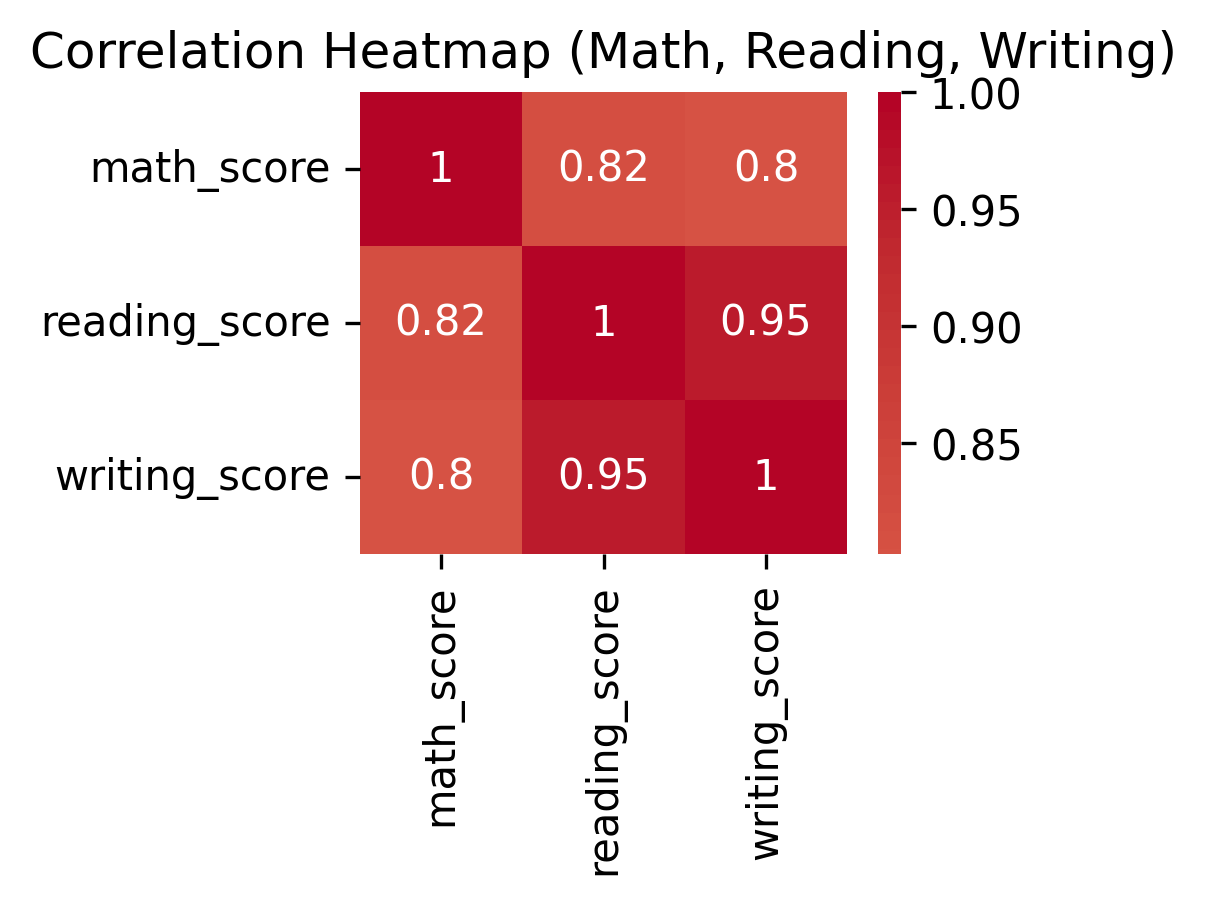

In [ ]:
corr = df_students[["math_score","reading_score","writing_score"]].corr()

fig, ax = plt.subplots(figsize=(2.62,2),dpi=300)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, ax=ax)
ax.set_title("Correlation Heatmap (Math, Reading, Writing)")
plt.show()


E.
V5 — Math vs reading with trend lines by test prep (2 pts)


a. Question: How strongly are math and reading scores associated, and do students who
completed the test‑preparation course have a different slope in the math–reading
relationship than those who did not?

ans:  Math and reading scores are strongly positively associated.

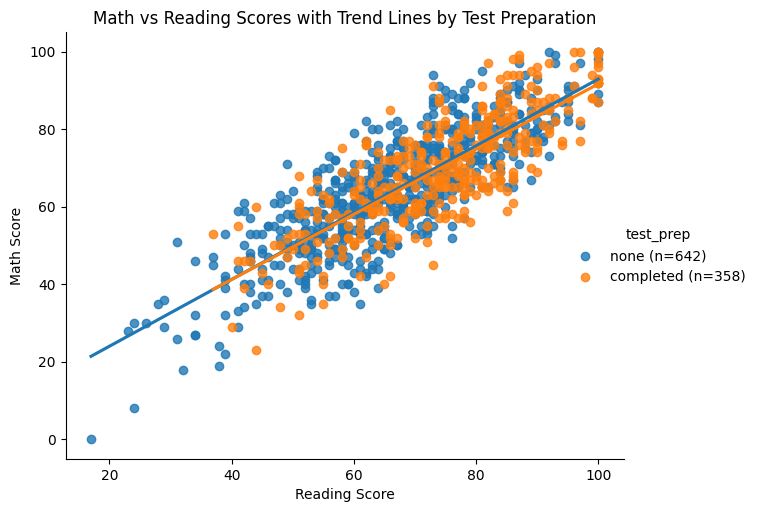

In [ ]:
# Creating scatter plot with trend lines
g = sns.lmplot(x="reading_score", y="math_score", hue="test_prep", data=df_students,ci=None, aspect=1.3)
g.set_axis_labels("Reading Score", "Math Score")

# Add group counts to the legend
for text in g.legend.texts:
    group_name = text.get_text()
    if group_name in test_prep_counts:
        text.set_text(f'{group_name} (n={test_prep_counts[group_name]})')

plt.title("Math vs Reading Scores with Trend Lines by Test Preparation")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.show()